# Prosper Loan Data Exploration

### Yagmur Dalman

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I choose 17 variables for my analysis.


In [3]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe, print statistics

loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# check duplicates 
loan.duplicated().sum()

0

In [7]:
# the columns will be used in the analysis
columns = ['Term','LoanStatus', 'BorrowerAPR','ProsperScore','ListingCategory (numeric)',
           'ProsperRating (numeric)','BorrowerState', 'Occupation',
           'EmploymentStatus','IsBorrowerHomeowner', 'LoanOriginalAmount',
           'DelinquenciesLast7Years', 'DebtToIncomeRatio','StatedMonthlyIncome']
# take the needed columns
df = loan[columns]
# drop the rows with missing value 
df.dropna(inplace = True)


In [8]:
# rename some of the columns to match the style
df.rename(columns = {'ProsperRating (numeric)':'ProsperRatingNumeric',
                     'ListingCategory (numeric)': 'ListingCategoryNumeric'}, inplace = True)


In [9]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 14 columns):
Term                       76224 non-null int64
LoanStatus                 76224 non-null object
BorrowerAPR                76224 non-null float64
ProsperScore               76224 non-null float64
ListingCategoryNumeric     76224 non-null int64
ProsperRatingNumeric       76224 non-null float64
BorrowerState              76224 non-null object
Occupation                 76224 non-null object
EmploymentStatus           76224 non-null object
IsBorrowerHomeowner        76224 non-null bool
LoanOriginalAmount         76224 non-null int64
DelinquenciesLast7Years    76224 non-null float64
DebtToIncomeRatio          76224 non-null float64
StatedMonthlyIncome        76224 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


In [10]:
df.head()

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategoryNumeric,ProsperRatingNumeric,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,LoanOriginalAmount,DelinquenciesLast7Years,DebtToIncomeRatio,StatedMonthlyIncome
1,36,Current,0.12016,7.0,2,6.0,CO,Professional,Employed,False,10000,0.0,0.18,6125.000000
3,36,Current,0.12528,9.0,16,6.0,GA,Skilled Labor,Employed,True,10000,14.0,0.15,2875.000000
4,36,Current,0.24614,4.0,2,3.0,MN,Executive,Employed,True,15000,0.0,0.26,9583.333333
5,60,Current,0.15425,10.0,1,5.0,NM,Professional,Employed,True,15000,0.0,0.36,8333.333333
6,36,Current,0.31032,2.0,1,2.0,KS,Sales - Retail,Employed,False,3000,0.0,0.27,2083.333333


In [11]:
# check for erroneous data
print(df.ProsperScore.unique())
print(df.ListingCategoryNumeric.unique())
print(df.ProsperRatingNumeric.unique())

[ 7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]
[ 2 16  1  7 13  6 15 20 19 18  8 11  3 14  9 17  0 10  5 12]
[6. 3. 5. 2. 4. 7. 1.]


There is no prosper score such 11 according to the data dictionary but in the Prosper website it is stated that  Prosper score ranges from 1 to 11, with 11 being the best, or lowest risk, score. So I will keep them.
https://www.prosper.com/plp/general-prosper_score/

### What is the structure of your dataset?

There are 76216 loans in the dataset with 14 attributes. They are: Term, LoanStatus, BorrowerAPR, ProsperScore, ListingCategory (numeric), ProsperRating (numeric), BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner, LoanOriginalAmount, DelinquenciesLast7Years, DebtToIncomeRatio, StatedMonthlyIncome.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in understanding what features are best for predicting the Borrower APR in the dataset. Also, I will be exploring the interaction between Prosper Score, Borrower Rate, Loan Original Amount and the other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect Prosper Score will have the strongest effect on Borrower APR: the higher Prosper Score, the lower Borrower APR. I also think that Loan Original Amount and Stated Monthly Income have effects on Borrower APR.

## Univariate Exploration

I'll start by looking at the distribution of each variable.

### Univariate Analysis

In [12]:
# set color
base_color = sb.color_palette()[0]

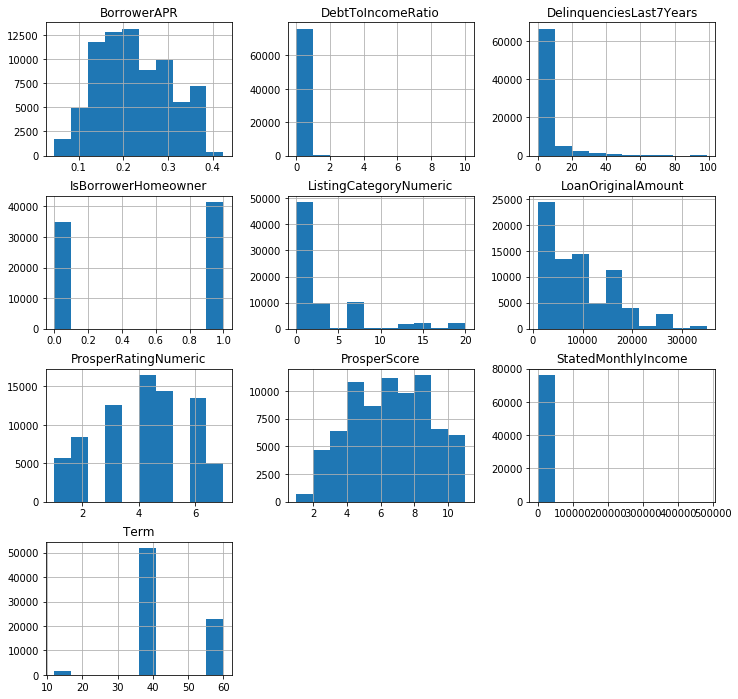

In [13]:
df.hist(figsize=(12,12));

#### Term

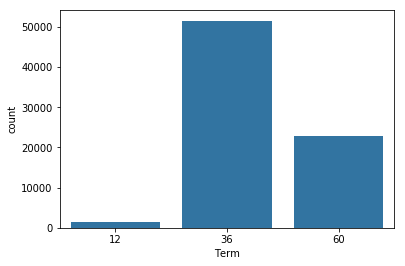

In [221]:
sb.countplot(data = df, x = 'Term', color = base_color)

The most common length of the loan is 36 months. 60 months is almost half of it and 12 months is the least common.

#### Loan Status

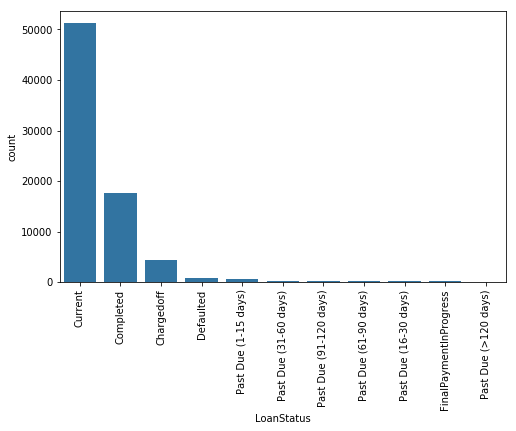

In [15]:
plt.figure(figsize=[8, 5]);
# order by count
status_order = df['LoanStatus'].value_counts().index
# plotting
sb.countplot(data = df, x = 'LoanStatus', color = base_color, order = status_order);
plt.xticks(rotation=90);


Most of the loans are current loans and completed, chargedoff loans follow it. Defaulted and past due loans are a small part of the distribution.

#### Borrower APR

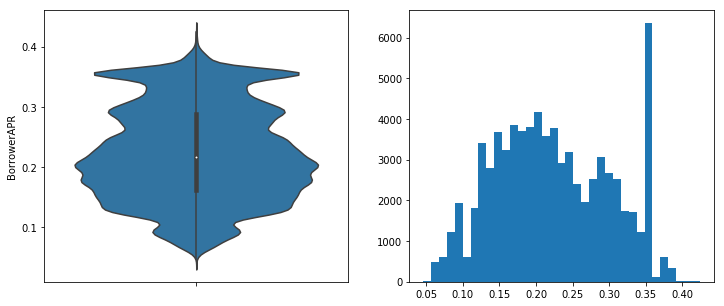

In [16]:
plt.figure(figsize = [12, 5])

plt.subplot(1,2,1)
sb.violinplot(data = df, y = 'BorrowerAPR', color = base_color);

plt.subplot(1,2,2)
plt.hist(data=df, x='BorrowerAPR', bins=35);



In [17]:
print(df.BorrowerAPR.describe())
print(df.BorrowerAPR.value_counts().head(3))
print(df.BorrowerAPR.mode())


count    76224.000000
mean         0.223904
std          0.079374
min          0.045830
25%          0.161570
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64
0.35797    2990
0.35643    1328
0.30532     782
Name: BorrowerAPR, dtype: int64
0    0.35797
dtype: float64


Borrower APR is the cost of credit as a yearly rate, and the sum of the interest rate and the other fees.

Borrower APR changes between 4% and 42%. The mean borrower APR is around 22% and most of the borrowers pay around %20.
The distribution of the Borrower APR is bimodal, first peak is around 20% and the second one,mode, is around 35%. Interestingly, , there's a jump in frequency right before 35%, and a sharp drop just after 35%
Interestingly, there is a sharp drop before  35%

#### Prosper Rating Numeric

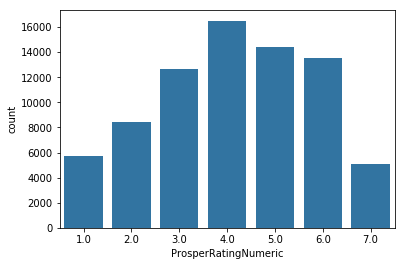

In [18]:
sb.countplot(data = df, x = 'ProsperRatingNumeric', color = base_color);


The Prosper Rating assigned as the following: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

The most common rating is C and the number of the borrowers with the highest rating AA is the lowest. The distribution seems like a normal distribution.

#### Prosper Score

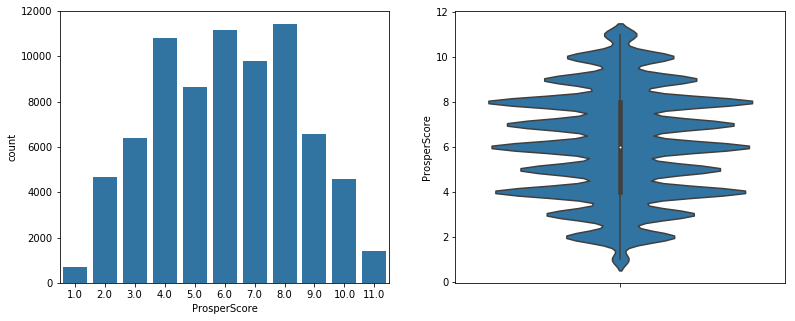

In [19]:
plt.figure(figsize = [13, 5]) 

plt.subplot(1,2,1)
sb.countplot(data = df, x = 'ProsperScore', color= base_color);

plt.subplot(1,2,2)
sb.violinplot(data = df, y = 'ProsperScore', color= base_color);


Prosper Score is the custom risk score was built using historical Prosper data to assess the risk of Prosper borrower listings. The output to Prosper users is a Prosper score which ranges from 1 to 11, with 11 being the best and 1 being the worst.

Its distribution is multimodal and has three peaks at 4, 6 and 8. The mean risk score is 6.

#### Listing Category

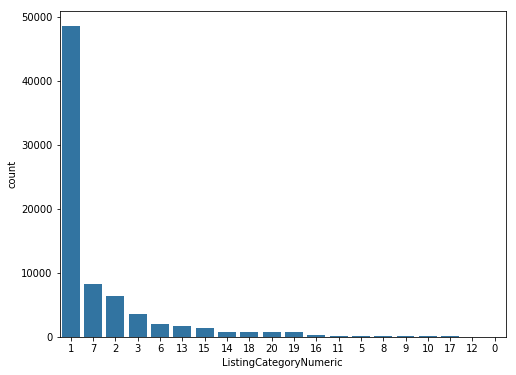

In [20]:
plt.figure(figsize=[8, 6]);
listing_order = df['ListingCategoryNumeric'].value_counts().index
sb.countplot(data = df, x = 'ListingCategoryNumeric', color = base_color, order = listing_order);


The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The higher proportion of the borrowers get loans for Debt Consolidation. Other reasons, Home Improvement and Business come after Debt Consolidation.

#### Borrower State

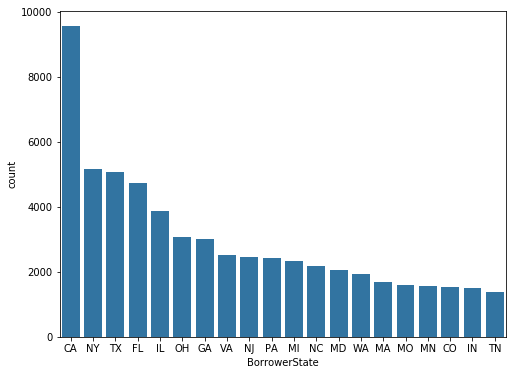

In [21]:
plt.figure(figsize=[8, 6]);

#order by count
state_order = df['BorrowerState'].value_counts()[:20].index

sb.countplot(data = df, x = 'BorrowerState', color = base_color, order = state_order);


Most of the borrowers are in California, New York, Texas, Florida and Illinois.

#### Occupation

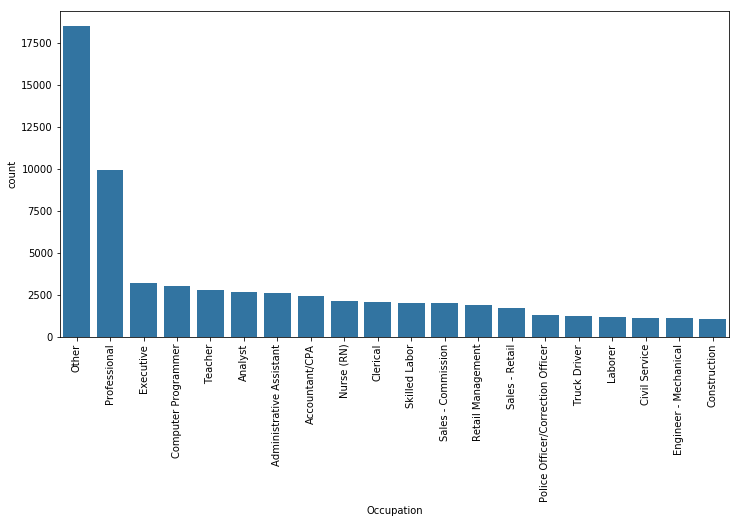

In [22]:
plt.figure(figsize=[12, 6]);
occup_order = df['Occupation'].value_counts()[:20].index
sb.countplot(data = df, x = 'Occupation', color = base_color, order = occup_order);
plt.xticks(rotation=90);


The number of borrowers who has an occupation in other category is the highest and number of borrowers who are professinal are the second highest.

#### Employment Status

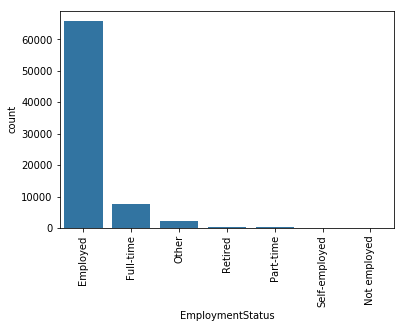

In [23]:
# order by count
occup_order = df['EmploymentStatus'].value_counts().index 

sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = occup_order);
plt.xticks(rotation=90);

Majority of the borrowers are employed and full time.

#### Is Borrower Homeowner

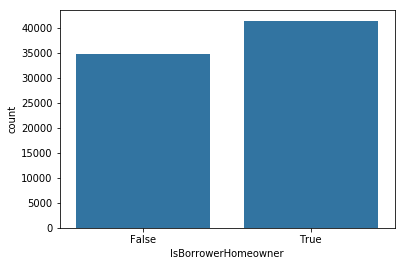

In [24]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color)

Most of the borrowers are homeowners.

#### Loan Original Amount

In [25]:
df.LoanOriginalAmount.describe()

count    76224.000000
mean      9294.811018
std       6413.578876
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14603.250000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

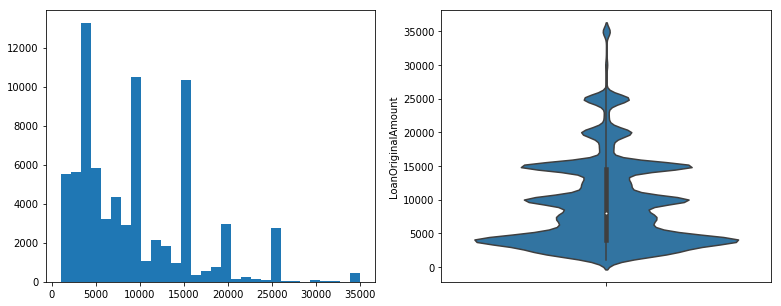

In [26]:
plt.figure(figsize = [13, 5]) 

plt.subplot(1,2,1)
plt.hist(data=df, x='LoanOriginalAmount', bins=30);

plt.subplot(1,2,2)
sb.violinplot(data = df, y = 'LoanOriginalAmount', color= base_color);



The distribution is multimodal. Most of the borrowers take loans smaller than 5000. There are three peaks around 4000, 10000 and 15000. There are steep jumps in frequencies just before these peak points.

#### Delinquencies in Last 7 Years

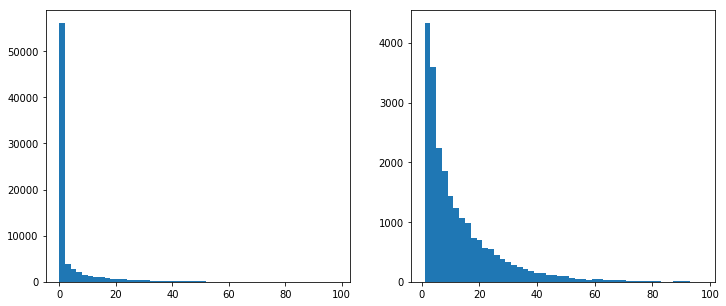

In [27]:
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1);
bins = np.arange(0, df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins);

plt.subplot(1, 2, 2);
bins = np.arange(1, df['DelinquenciesLast7Years'].max(), 2)
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins);


Most of the borrowers have no delinquencies in the last 7 years. By excluding 0 values the distribution can be seen more clearly. It looks like an exponential distribution. Maximum number of delinquencies is 99 and the mean number is around 3. There are a small number of people who has delinquencies smaller than 20, and the number of other borrowers are even smaller.

#### Stated Monthly Income

In [28]:
df['StatedMonthlyIncome'].max()

483333.333333

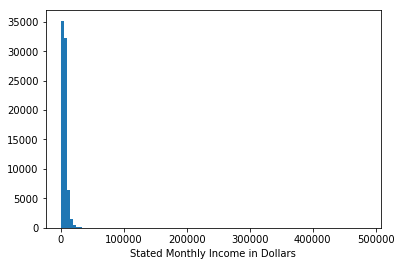

In [29]:
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=100);
plt.xlabel('Stated Monthly Income in Dollars');

The distribution of stated monthly income is highly right-skewed. The high numbers for income are outliers and also remember that the maximum loan original amount is \$35000. Thus I will limit income by 35000 and have a closer look.

In [30]:
df = df[df['StatedMonthlyIncome'] < 35000]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76103 entries, 1 to 113936
Data columns (total 14 columns):
Term                       76103 non-null int64
LoanStatus                 76103 non-null object
BorrowerAPR                76103 non-null float64
ProsperScore               76103 non-null float64
ListingCategoryNumeric     76103 non-null int64
ProsperRatingNumeric       76103 non-null float64
BorrowerState              76103 non-null object
Occupation                 76103 non-null object
EmploymentStatus           76103 non-null object
IsBorrowerHomeowner        76103 non-null bool
LoanOriginalAmount         76103 non-null int64
DelinquenciesLast7Years    76103 non-null float64
DebtToIncomeRatio          76103 non-null float64
StatedMonthlyIncome        76103 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


We only lost 121 loan data.

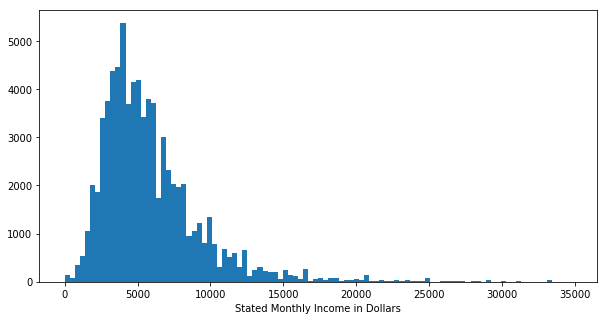

In [32]:
plt.figure(figsize = [10, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=100);
plt.xlabel('Stated Monthly Income in Dollars');


In [33]:
df.StatedMonthlyIncome.describe()

count    76103.000000
mean      5911.987444
std       3553.460294
min          0.250000
25%       3583.333333
50%       5010.250000
75%       7208.333333
max      34813.250000
Name: StatedMonthlyIncome, dtype: float64

The distribution is still right-skewed. The mean of monthly income is around 6k, the median income is around 5k and 75% of the borrowers have an income smaller than 7,2k and just a small proportion of borrowers have an income higher than 20k.

Since the people with very high income generally do not need loans it makes sense there are not many borrowers with high incomes.


We can also apply log transformation to StatedMonthlyIncome to have a normally distributed data.

In [34]:
np.log10(df.StatedMonthlyIncome.describe())

count    4.881402
mean     3.771734
std      3.550651
min     -0.602060
25%      3.554287
50%      3.699859
75%      3.857835
max      4.541745
Name: StatedMonthlyIncome, dtype: float64

(100, 100000)

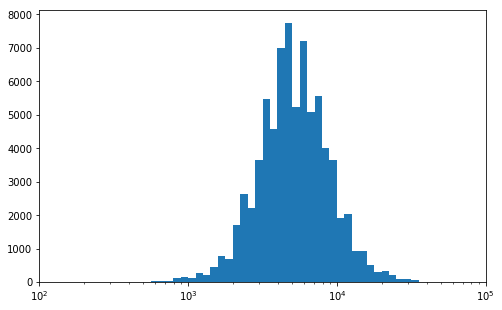

In [35]:
# apply log transformation to StatedMonthlyIncome
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(-0.6, np.log10(df.StatedMonthlyIncome.max())+0.05, 0.05)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin_edges);
plt.xscale('log')
plt.xlim(100,100000)



#### Debt To Income Ratio

In [36]:
df.DebtToIncomeRatio.describe()

count    76103.00000
mean         0.25832
std          0.32075
min          0.00000
25%          0.15000
50%          0.22000
75%          0.32000
max         10.01000
Name: DebtToIncomeRatio, dtype: float64

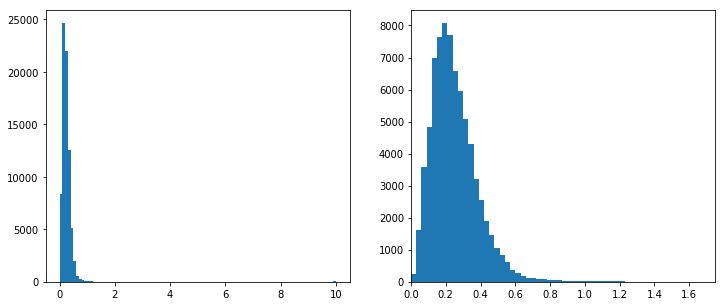

In [37]:
plt.figure(figsize = [12, 5]) 

plt.subplot(1, 2, 1);
plt.hist(data=df, x='DebtToIncomeRatio', bins =100);

plt.subplot(1, 2, 2);
bins = np.arange(0, df.DebtToIncomeRatio.max()+ 0.03, 0.03)
plt.hist(data = df, x = 'DebtToIncomeRatio',bins=bins);
plt.xlim(0,1.75);

Similar to the stated monthly income, the distribution is unimodal and skewed right. The ratio varies from 0 to 10 but there is a small number of borrowers with debt to income ratio greater than 1. The distribution is more clear in the second plot. The high ratios are outliers and and I will limit ratio by 1. 

In [38]:
df = df[df['DebtToIncomeRatio'] < 1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75774 entries, 1 to 113936
Data columns (total 14 columns):
Term                       75774 non-null int64
LoanStatus                 75774 non-null object
BorrowerAPR                75774 non-null float64
ProsperScore               75774 non-null float64
ListingCategoryNumeric     75774 non-null int64
ProsperRatingNumeric       75774 non-null float64
BorrowerState              75774 non-null object
Occupation                 75774 non-null object
EmploymentStatus           75774 non-null object
IsBorrowerHomeowner        75774 non-null bool
LoanOriginalAmount         75774 non-null int64
DelinquenciesLast7Years    75774 non-null float64
DebtToIncomeRatio          75774 non-null float64
StatedMonthlyIncome        75774 non-null float64
dtypes: bool(1), float64(6), int64(3), object(4)
memory usage: 8.2+ MB


Data size decreased from 76224 to 75774 after excluding outliers in *StatedMonthlyIncome* and *DebtToIncomeRatio* columns.

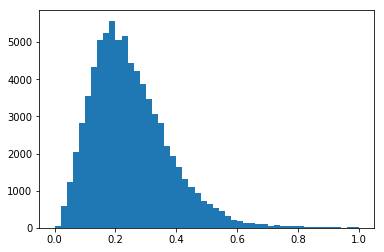

In [39]:
bins = np.arange(0, df.DebtToIncomeRatio.max()+ 0.02, 0.02)
plt.hist(data = df, x = 'DebtToIncomeRatio',bins=bins);


The distribution is still skewed-rigt. The mean ratio around 0.25 which means that borrowers get loans about 25% of their income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Borrower APR data is bimodal, with one peak around 20% and the second one,mode, around 35%.
- Prosper Score data is multimodal and has three peaks at 4, 6 and 8, the mean risk score is 6.
- Loan Original Amount data is multimodal. Most of the borrowers take loans smaller than 5000. There are three peaks around 4000, 10000 and 15000.

 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were a number of outlier points in the StatedMonthlyIncome and DebtToIncomeRatio columns. It does not seem realistic the people who have really high montly incomes to borrow money. Since they are 'stated' monthly incomes, it is possible that the borrowers did not report their true income. Also, the high numbers for DebtToIncomeRatio means that some people have too much debt considering their income. Thus, I removed those outliers from the dataset and the data size decreased from 76224 to 75774.

I applied log transformation to the right-skewed Stated Monthly Income data and obtain normally distributed data.


## Bivariate Exploration

First, have a look at the pairwise correlations present between features in the data.